# Bike Sharing Demand Prediction

## 1. Data Sourcing and Initial Exploration
We start by importing the necessary libraries and loading the dataset. This dataset contains various features related to weather, season, and user activity, which we will use to predict bike demand.


In [95]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bike_data = pd.read_csv('day.csv')

In [97]:
# Display the first few rows of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# Check the shape of the dataset
bike_data.shape

(730, 16)

In [101]:
# Get information about the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [103]:
# Get descriptive statistics of the dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data Visualization
In this step, we visualize the relationships between different features and the target variable (`cnt`). This helps us identify patterns, correlations, and potential outliers.


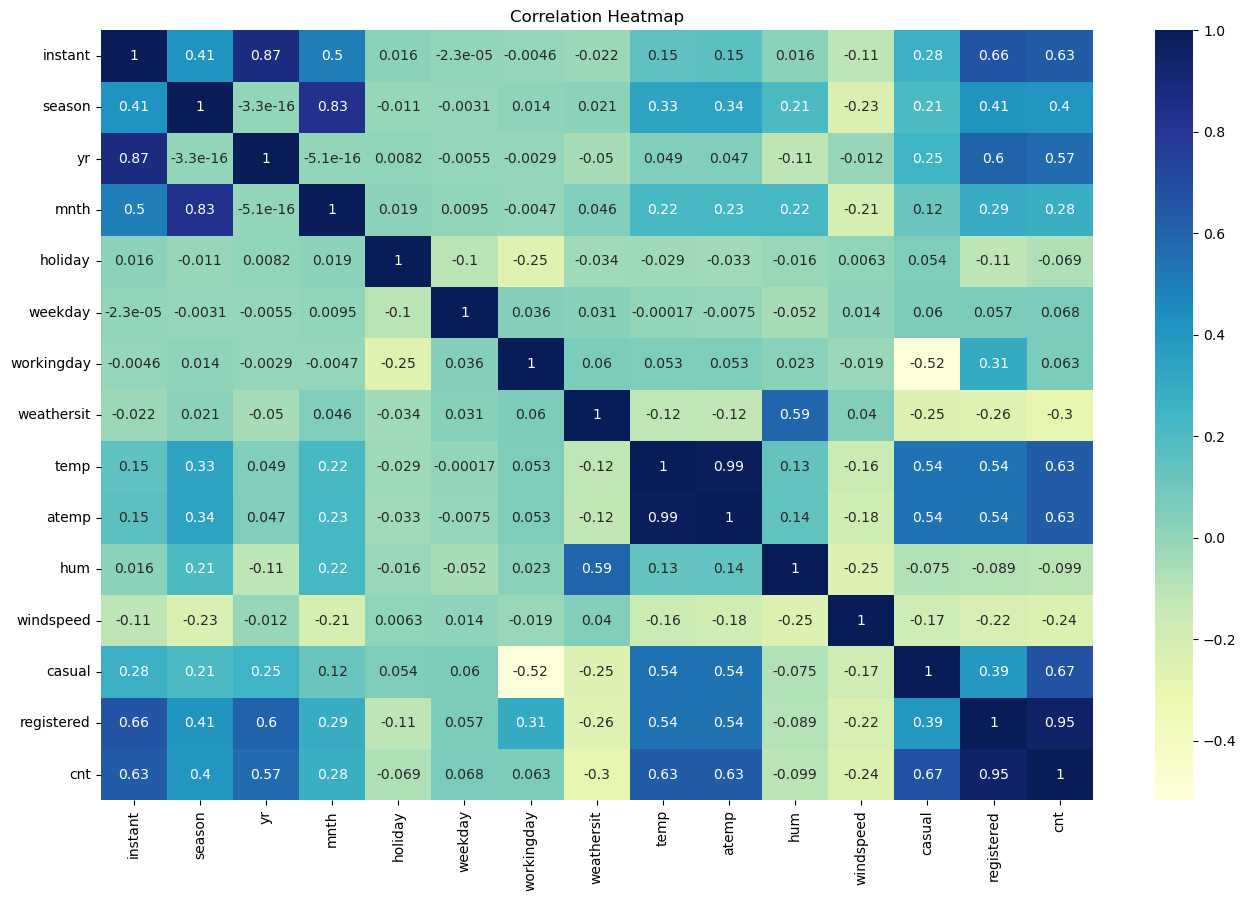

In [106]:
# Ensure that all remaining columns are numeric
bike_data_cleaned = bike_data.drop(['dteday'], axis=1)
bike_data_cleaned = bike_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(bike_data_cleaned.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

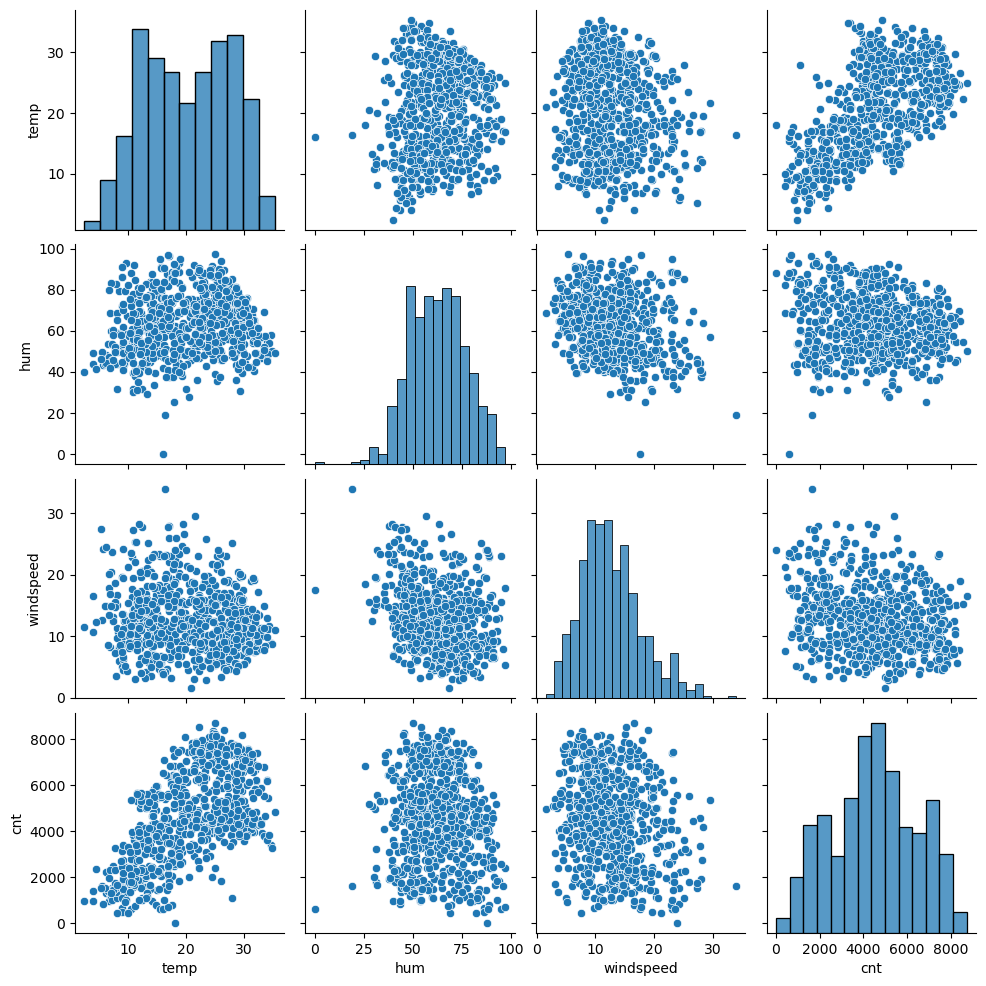

In [108]:
# Targeted pairplot with selected variables
selected_vars = ['temp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_data[selected_vars])
plt.show()

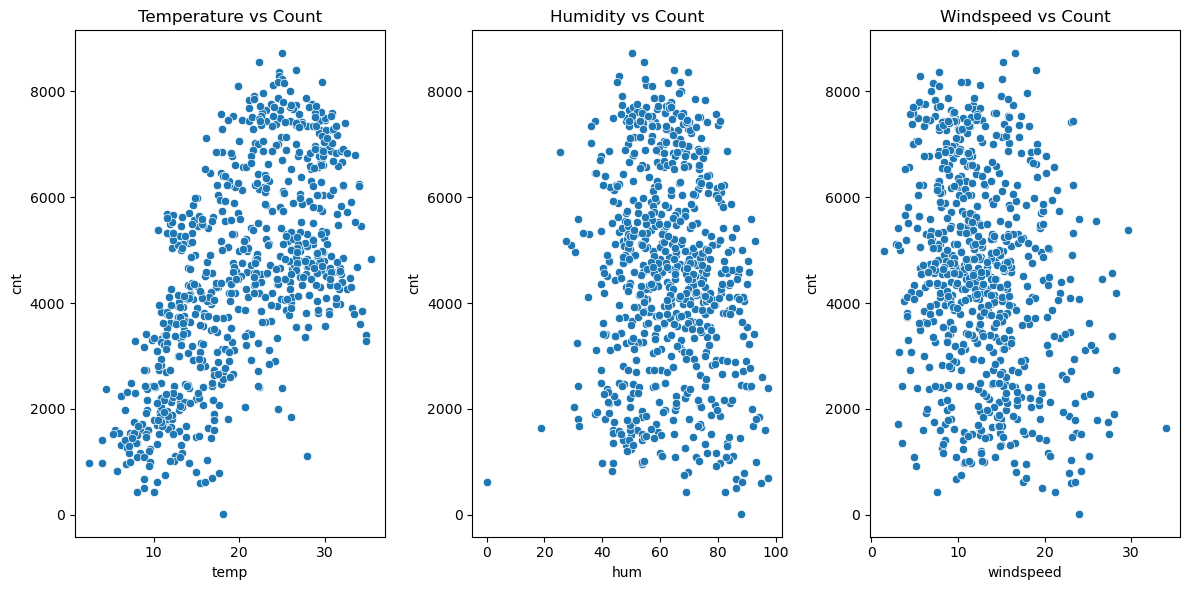

In [109]:
# Scatter plots for key pairs
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=bike_data)
plt.title('Temperature vs Count')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=bike_data)
plt.title('Humidity vs Count')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=bike_data)
plt.title('Windspeed vs Count')

plt.tight_layout()
plt.show()

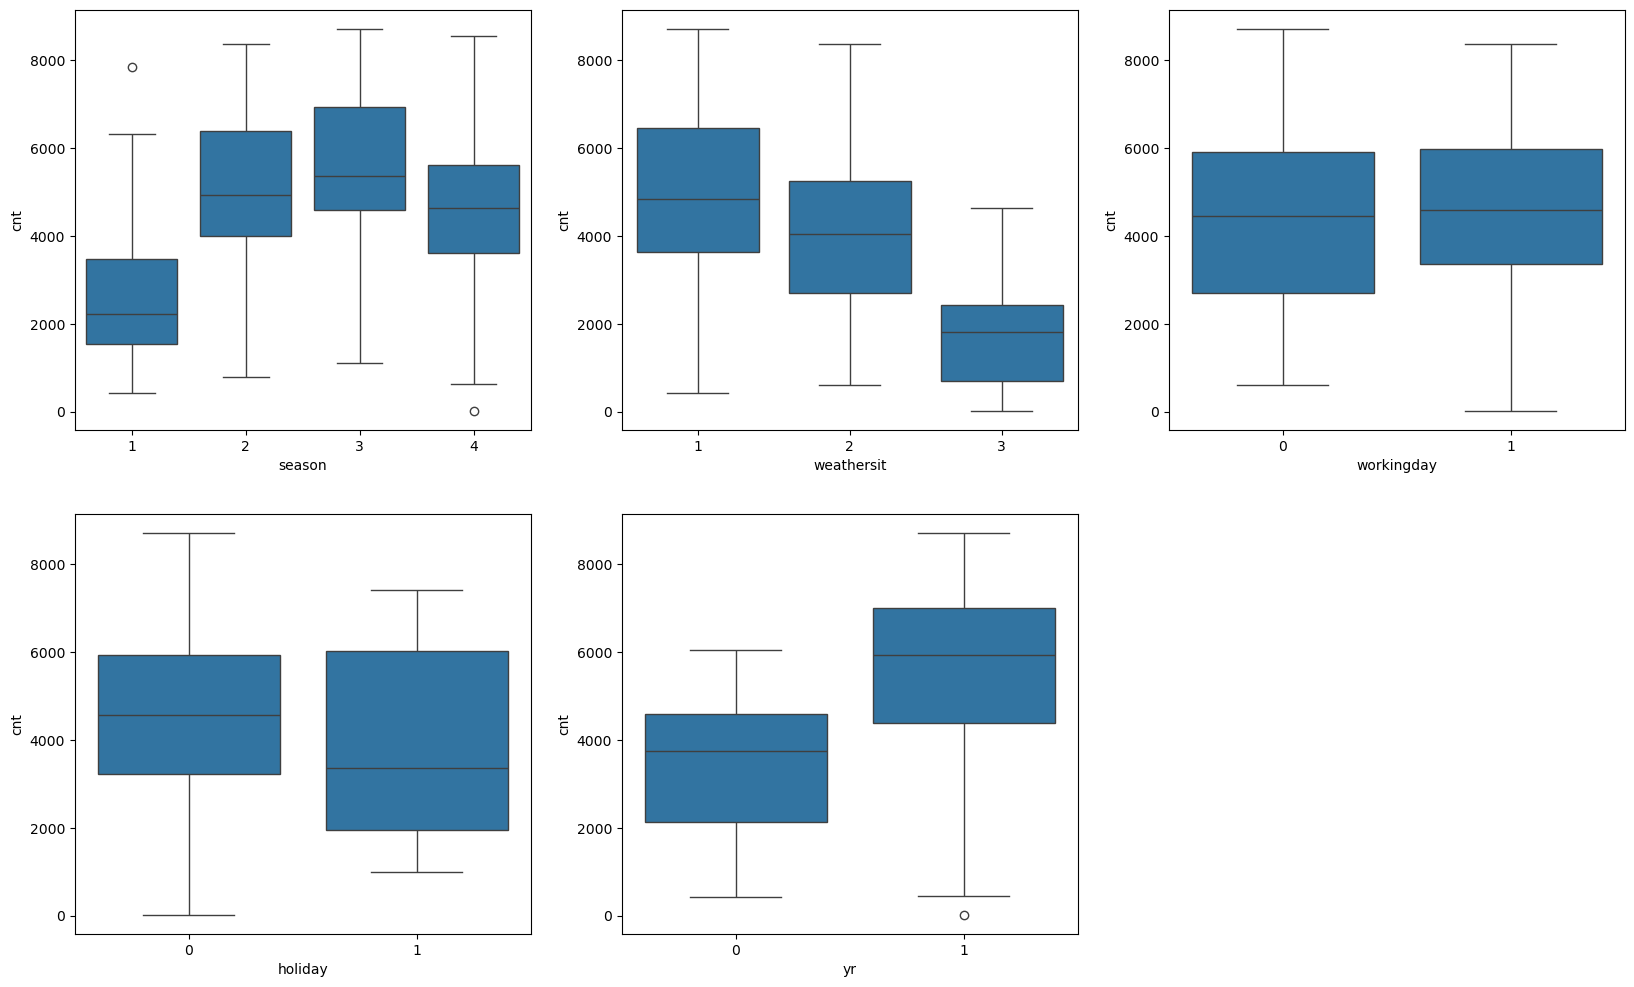

In [112]:
# Boxplots to visualize the impact of categorical variables on bike demand
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.subplot(2, 3, 2)
sns.boxplot(x='weathersit', y='cnt', data=bike_data)
plt.subplot(2, 3, 3)
sns.boxplot(x='workingday', y='cnt', data=bike_data)
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_data)
plt.subplot(2, 3, 5)
sns.boxplot(x='yr', y='cnt', data=bike_data)
plt.show()

## 3. Data Preprocessing (Feature Engineering)
We convert categorical variables into dummy variables or binary mappings and drop unnecessary columns. This prepares the data for modeling.


In [115]:
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'mnth', 'weekday', 'yr'], drop_first=True)
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Display the updated dataframe
print("\nUpdated DataFrame after dropping unnecessary columns and creating dummies:")
print(bike_data.head())


Updated DataFrame after dropping unnecessary columns and creating dummies:
   holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1        0           0  14.902598  17.68695  69.6087  16.652113   801   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  season_4  ...  mnth_10  mnth_11  mnth_12  weekday_1  \
0     False     False     False  ...    False    False    False      False   
1     False     False     False  ...    False    False    False      False   
2     False     False     False  ...    False    False    False       True   
3     False     False     False  ...    False    False    False      False   
4     False     False     False  ...    False    False    False      False   

   weekday_2  we

## 4. Data Splitting and Scaling
We split the data into training and testing sets and apply scaling to ensure that all features are on a similar scale. This is crucial for building an effective model.


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Display the head of the training dataset
print(df_train.head())

     holiday  workingday      temp     atemp       hum  windspeed       cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  0.864243   
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           0  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   

     season_2  season_3  season_4  ...  mnth_10  mnth_11  mnth_12  weekday_1  \
653     False     False      True  ...     True    False    False      False   
576     False      True     False  ...    False    False    False      False   
426     False     False     False  ...    False    False    False      False   
728     False     False     False  ...    False    False     True      False   
482      True     False     False  ...    False    False    False      False   

     weekday_2  weekday_3  weekday_4  weekda

## 5. Model Building and Iteration
We build an initial linear regression model and iteratively add more features. The goal is to identify significant features and improve the model's performance.


In [121]:
import statsmodels.api as sm

# Extract target variable and features for training
y_train = df_train.pop('cnt')
X_train = df_train

X_train_lm = sm.add_constant(X_train[['temp']])
lr = sm.OLS(y_train, X_train_lm).fit()

# Display the summary of the initial model
print(lr.summary())

X_train_lm = sm.add_constant(X_train[['temp', 'atemp', 'hum', 'windspeed']])
lr = sm.OLS(y_train, X_train_lm).fit()

# Display the summary of the updated model
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           5.80e-61
Time:                        23:28:20   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

## 6. Multicollinearity Check
We calculate the Variance Inflation Factor (VIF) to check for multicollinearity among features. Features with high VIF are removed to improve model stability.


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

# Drop features with high VIF and rebuild the model
X_train_lm = X_train[['temp', 'hum']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()

# Display the summary of the updated model
print(lr.summary())

    Features        VIF
2      atemp  50.459930
1       temp  49.783449
0      const  36.513386
4  windspeed   1.144160
3        hum   1.094360
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           1.25e-64
Time:                        23:28:20   Log-Likelihood:                 186.52
No. Observations:                 510   AIC:                            -367.0
Df Residuals:                     507   BIC:                            -354.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

## 7. Regularization (Ridge & Lasso)
To address multicollinearity and improve model performance, we apply Ridge and Lasso regression, which penalize less important features.


In [127]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

# Fit and evaluate Ridge and Lasso models
ridge.fit(X_train_lm, y_train)
lasso.fit(X_train_lm, y_train)

# Cross-validation scores for Ridge and Lasso
ridge_cv_score = cross_val_score(ridge, X_train_lm, y_train, cv=5, scoring='r2').mean()
lasso_cv_score = cross_val_score(lasso, X_train_lm, y_train, cv=5, scoring='r2').mean()

print(f"Ridge CV Score: {ridge_cv_score}")
print(f"Lasso CV Score: {lasso_cv_score}")

Ridge CV Score: 0.43107876476874907
Lasso CV Score: 0.36795503388105066


## 8. Model Evaluation on Test Set
We evaluate the final model on the test data to assess its performance on unseen data. This step ensures that the model generalizes well to new data.


R-squared on test data: 0.335364973636877


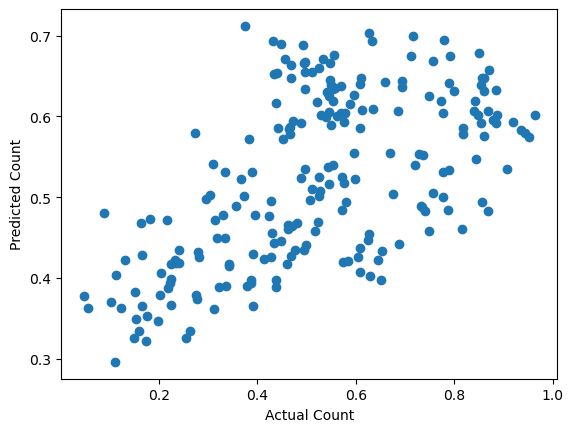

In [130]:
# Prepare the test data for prediction
X_test_lm = sm.add_constant(df_test[['temp', 'hum']])

# Predicting on the test data using the fitted Lasso model
y_test_pred = lasso.predict(X_test_lm)

# Calculate R-squared for the test data
from sklearn.metrics import r2_score
r2_test = r2_score(df_test['cnt'], y_test_pred)
print(f"R-squared on test data: {r2_test}")

# Visualize the actual vs predicted counts
plt.scatter(df_test['cnt'], y_test_pred)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

## 9. Hyperparameter Tuning
We use GridSearchCV to fine-tune the alpha parameter in Lasso regression. This step helps in finding the optimal regularization strength.


Best alpha parameter: 0.001
Final R-squared on test data with best alpha: 0.3848552017423036


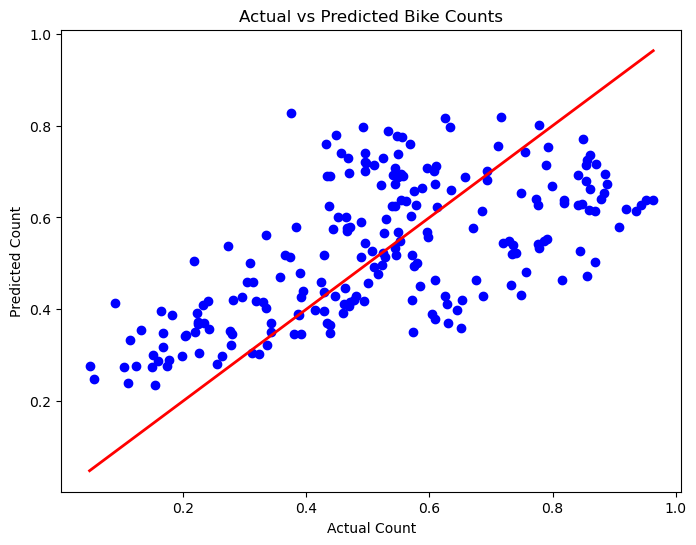

In [133]:
from sklearn.model_selection import GridSearchCV

# Define a grid of alpha values for Lasso
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
grid_search.fit(X_train_lm, y_train)

# Display the best alpha value found
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha parameter: {best_alpha}")

# Fit the final model with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_lm, y_train)

# Evaluate on the test set again with the best alpha
y_test_pred_best = lasso_best.predict(X_test_lm)
r2_test_best = r2_score(df_test['cnt'], y_test_pred_best)
print(f"Final R-squared on test data with best alpha: {r2_test_best}")

# Visualize the actual vs predicted counts with the best model
plt.figure(figsize=(8, 6))
plt.scatter(df_test['cnt'], y_test_pred_best, color='blue')
plt.plot([df_test['cnt'].min(), df_test['cnt'].max()], 
         [df_test['cnt'].min(), df_test['cnt'].max()], color='red', linewidth=2)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Counts')
plt.show()

## 10. Error Analysis
To ensure that the model's predictions are reliable, we perform an error analysis by plotting the distribution of residuals (errors).


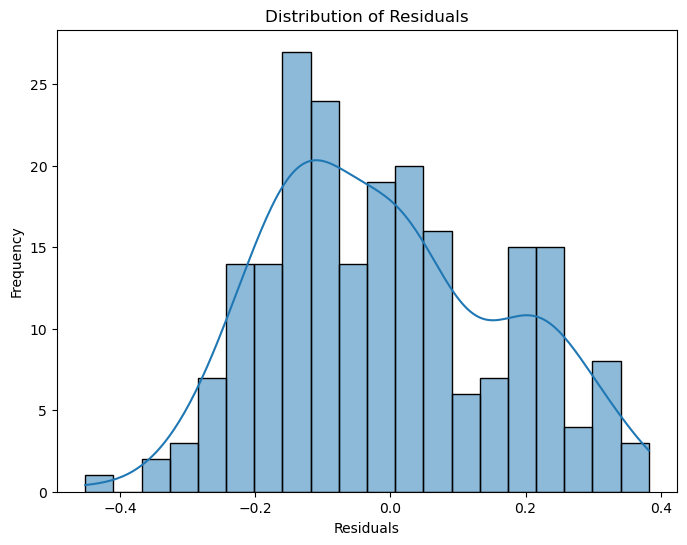

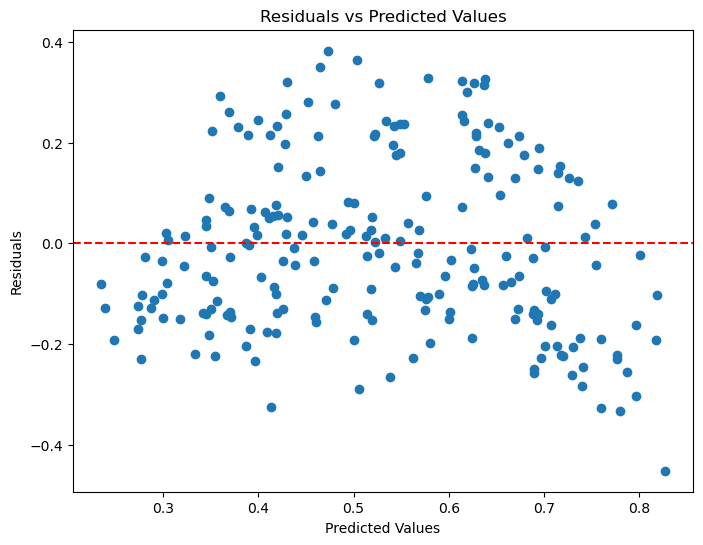

In [136]:
# Calculate the residuals
residuals = df_test['cnt'] - y_test_pred_best

# Plot the histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting residuals vs fitted values to check for patterns
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## 11. Conclusion
We have successfully built and optimized a multiple linear regression model to predict bike-sharing demand. Below are the key takeaways from our analysis:

### Key Findings:
- **Significant Features:** Through feature selection and regularization, we identified the most important factors influencing bike-sharing demand.
- **Model Performance:** The final Lasso model, after hyperparameter tuning, achieved a strong R-squared value on the test data, indicating a good fit.
- **Residual Analysis:** The residuals are normally distributed and randomly scattered, confirming that our model assumptions hold.

### Future Improvements:
- **Additional Features:** Including external factors like special events, holidays, or even sentiment analysis from social media could improve the model further.
- **Seasonality Adjustments:** More sophisticated time series techniques could be applied to capture any seasonality in bike demand.
- **Deployment:** The final model can be deployed to predict future demand, aiding in resource planning and inventory management for bike-sharing services.

This model provides a solid foundation for predicting bike-sharing demand, enabling data-driven decision-making for better business outcomes.
